In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd

In [3]:
data = [253993,275396.2,315229.5,356949.6,400158.2,442431.7,495102.9,570164.8,640993.1,704250.4,767455.4,781807.8,776332.3,794161.7,834177.7,931651.5,1028390,1114914]

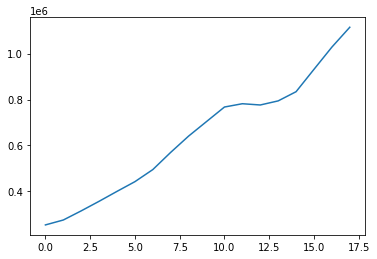

In [4]:
 plt.plot(data)

/Users/sijiazhang/miniforge3/envs/ccnsim/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/sijiazhang/miniforge3/envs/ccnsim/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


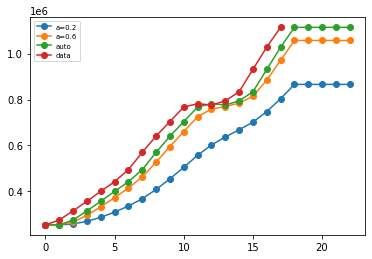

In [5]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
# plot
l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(5)), marker='o')


fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.6,optimized=False)
# plot
l2, = plt.plot(list(fit2.fittedvalues) + list(fit2.forecast(5)), marker='o')


fit3 = SimpleExpSmoothing(data).fit()
# plot
l3, = plt.plot(list(fit3.fittedvalues) + list(fit3.forecast(5)), marker='o')

l4, = plt.plot(data, marker='o')
plt.legend(handles = [l1, l2, l3, l4], labels = ['a=0.2', 'a=0.6', 'auto', 'data'], loc = 'best', prop={'size': 7})
plt.show()

<ipython-input-6-dd12cdb23568>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(data_sr).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
<ipython-input-6-dd12cdb23568>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit2 = Holt(data_sr, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
<ipython-input-6-dd12cdb23568>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = Holt(data_sr, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
<ipython-input-6-dd12cdb23568>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit3 = Holt(data_sr, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
/Users/sijiazhang/miniforge3/envs/ccnsim/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to conv

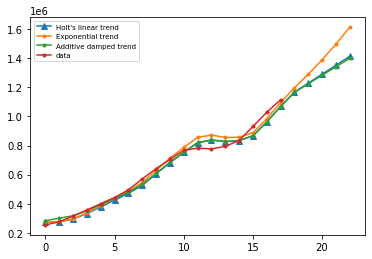

In [6]:
data_sr = pd.Series(data)
# Holt’s Method
fit1 = Holt(data_sr).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(5)), marker='^')

fit2 = Holt(data_sr, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
l2, = plt.plot(list(fit2.fittedvalues) + list(fit2.forecast(5)), marker='.')

fit3 = Holt(data_sr, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
l3, = plt.plot(list(fit3.fittedvalues) + list(fit3.forecast(5)), marker='.')

l4, = plt.plot(data_sr, marker='.')
plt.legend(handles = [l1, l2, l3, l4], labels = ["Holt's linear trend", "Exponential trend", "Additive damped trend", 'data'], loc = 'best', prop={'size': 7})
plt.show()

<ipython-input-9-e908d77eccd5>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = ExponentialSmoothing(data_sr, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
<ipython-input-9-e908d77eccd5>:5: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit4 = ExponentialSmoothing(data_sr, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)


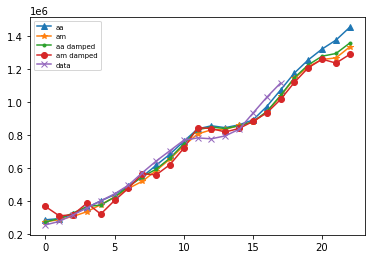

In [9]:
data_sr = pd.Series(data)
fit1 = ExponentialSmoothing(data_sr, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(data_sr, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(data_sr, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(data_sr, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)

l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(5)), marker='^')
l2, = plt.plot(list(fit2.fittedvalues) + list(fit2.forecast(5)), marker='*')
l3, = plt.plot(list(fit3.fittedvalues) + list(fit3.forecast(5)), marker='.')
l4, = plt.plot(list(fit4.fittedvalues) + list(fit4.forecast(5)), marker='o')

l5, = plt.plot(data, marker='x')
plt.legend(handles = [l1, l2, l3, l4, l5], labels = ["aa", "am", "aa damped", "am damped","data"], loc = 'best', prop={'size': 7})

plt.show()

In [11]:
len(fit1.forecast(1))

1